 #

# Ma422 Project - Adult income dataset

#### Objective : The objective is to predict, according to some characteristics, if a person earns more than $50K per year or not


We import the librairies we need to read the datas and analyse it.

In [278]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import warnings

warnings.filterwarnings('ignore')

We open and read the datas file.

In [279]:
df = pd.read_csv('src/datas/adult.csv')
print(df.head())
print(df.shape)

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

## 1 - Quick dataset analysis

Now that the dataset is imported in the jupyter file, we can start exploring, digging in the datas to see what it is composed of, understand the variables in it, the possible links between them, find the target etc. This step is very important because it allows the user to understand the meaning of datasets, see if information has to be changed, or removed and also start thinking about how datas should be used with the future implemented model.

### A) Dataset cleaning and verifications



First, we check if there are repetitions of observations in the dataset. If yes, we erase them with the method `drop_duplicates` from `pandas` library.

In [280]:
df = df.drop_duplicates()
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [281]:
# Remplace "?" by NaN
df.replace('?', np.nan, inplace=True)

Then, we remove them in order to have valid datas to send to the model.
We will use the method `isna` from `pandas` library to list the missing values.

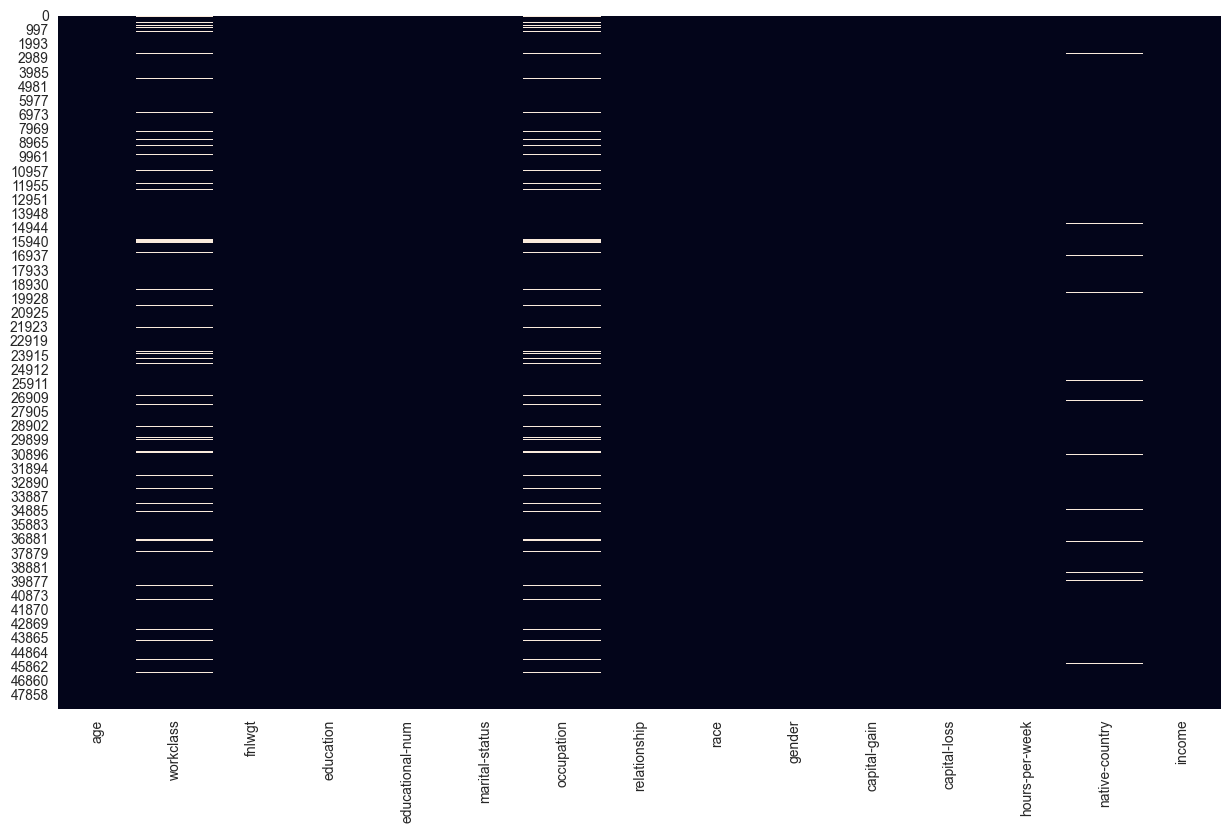

age                0.000000
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
income             0.000000
native-country     0.017545
workclass          0.057286
occupation         0.057491
dtype: float64


In [282]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isna(), cbar=False)
plt.show()

percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)

print(percentageOfNaNValues)  # Normalized values between O and 1

We use the method `dropna` to remove the lines containing at least one missing value.

In [283]:
# Removing the rows containing the missing values
df.dropna(inplace=True)
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fi

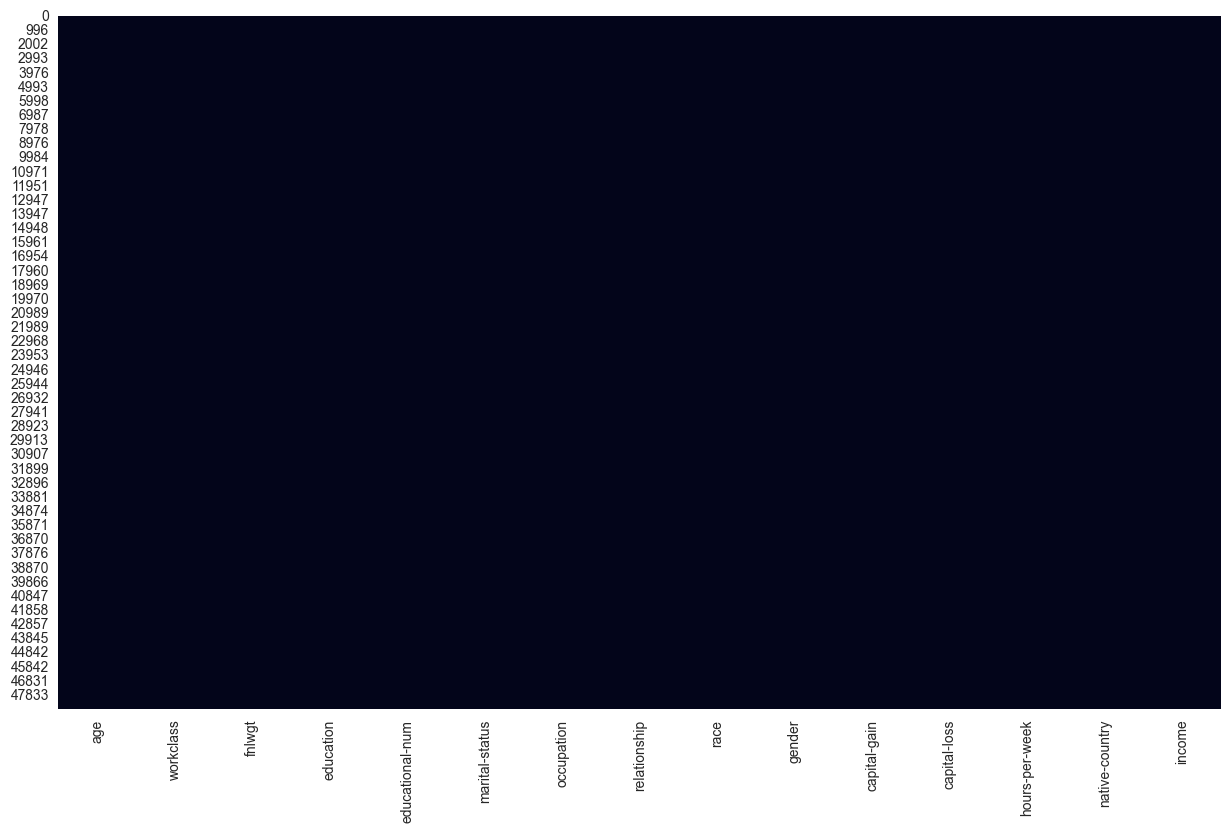

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64


In [284]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.isna(), cbar=False)
plt.show()

percentageOfNaNValues = (df.isna().sum() / df.shape[0]).sort_values(ascending=True)

print(percentageOfNaNValues)

### B) Analysis of the dataset

We can start by displaying some charcteristics in order to know the size of the dataset and what's inside.

In [285]:
columnNames = df.columns
datasetShape = df.shape
variablesTypes = df.dtypes
variablesTypesCount = df.dtypes.value_counts()

print('Column names :', columnNames, '\n')
print('Dataset Shape :', datasetShape, '\n')
print('Variables Types :', variablesTypes, '\n')
print('Variables Types Count :', variablesTypesCount)

Column names : Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object') 

Dataset Shape : (45175, 15) 

Variables Types : age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object 

Variables Types Count : object    9
int64     6
dtype: int64


### C) Analysis of the target variable

Repartition of the target :
 <=50K    33973
>50K     11202
Name: income, dtype: int64

Type of this variable: object


<Axes: ylabel='income'>

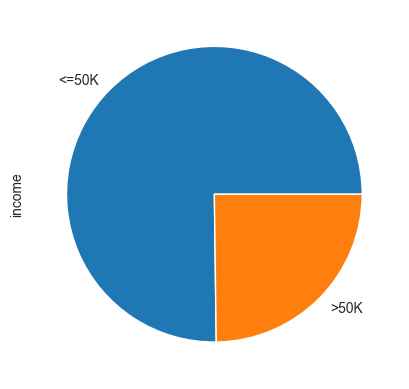

In [286]:
count_target = df['income'].value_counts()
target_type = df['income'].dtype

print('Repartition of the target :\n', count_target)
print('\nType of this variable:', target_type)
count_target.plot.pie()

## 2 - Pre-processing

In [287]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

First, we make a copy of the original dataset.

In [288]:
df_copy = df.copy()  # Create a copy of the original dataset
# print(df_copy.head())

Encoding the data

In [289]:
# LabelEncoding
encoder = preprocessing.LabelEncoder()
features = ['workclass', 'education', 'occupation', 'race', 'gender', 'native-country', 'income','marital-status','relationship']
df[features] = df[features].apply(encoder.fit_transform)
print(df.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
5   34          2  198693          0                6               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
5           7             1     4       1             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

We will create a dictionnary that will store the encoded value of the original values. It could be useful if we want to do predictions on new observations, to encode the new raw datas.

In [290]:
# Build a dico with original values as key and their encoded values as value (WITH THE REDUCED DATAFRAME)
numerical_variables = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt']
categorical_variables = ['workclass', 'education', 'occupation', 'race', 'gender', 'native-country', 'income','marital-status','relationship']
dicoEncoding = {}

for varOri, varEnc in itertools.zip_longest(df_copy, df, fillvalue=''):  # Iterate in the original dataset and the encoded one
    # Looking for the categorical variables
    if (varOri == varEnc) and (varOri in categorical_variables) and (varEnc in categorical_variables):
        dicoVar = {}  # Create a dictionary to store all combinations
        for elem1, elem2 in itertools.zip_longest(df_copy[varOri], df[varEnc], fillvalue=''):  # Iterate in columns of the original and encoded datasets
            dicoVar[elem1] = elem2  # Assign the encoded value corresponding to the original value
        dicoEncoding[varOri] = dicoVar  # Store the dictionary (columns) in the general dictionary

    # Looking for the numerical variables
    if (varOri == varEnc) and (varOri in numerical_variables) and (varEnc in numerical_variables):
        dicoVar = {}
        for elem1, elem2 in itertools.zip_longest(df_copy[varOri], df[varEnc], fillvalue=''):
            dicoVar[elem1] = elem2
        dicoEncoding[varOri] = dicoVar

#print(dicoEncoding)

Now, we can compute the correlation to see the correlations between the variables.

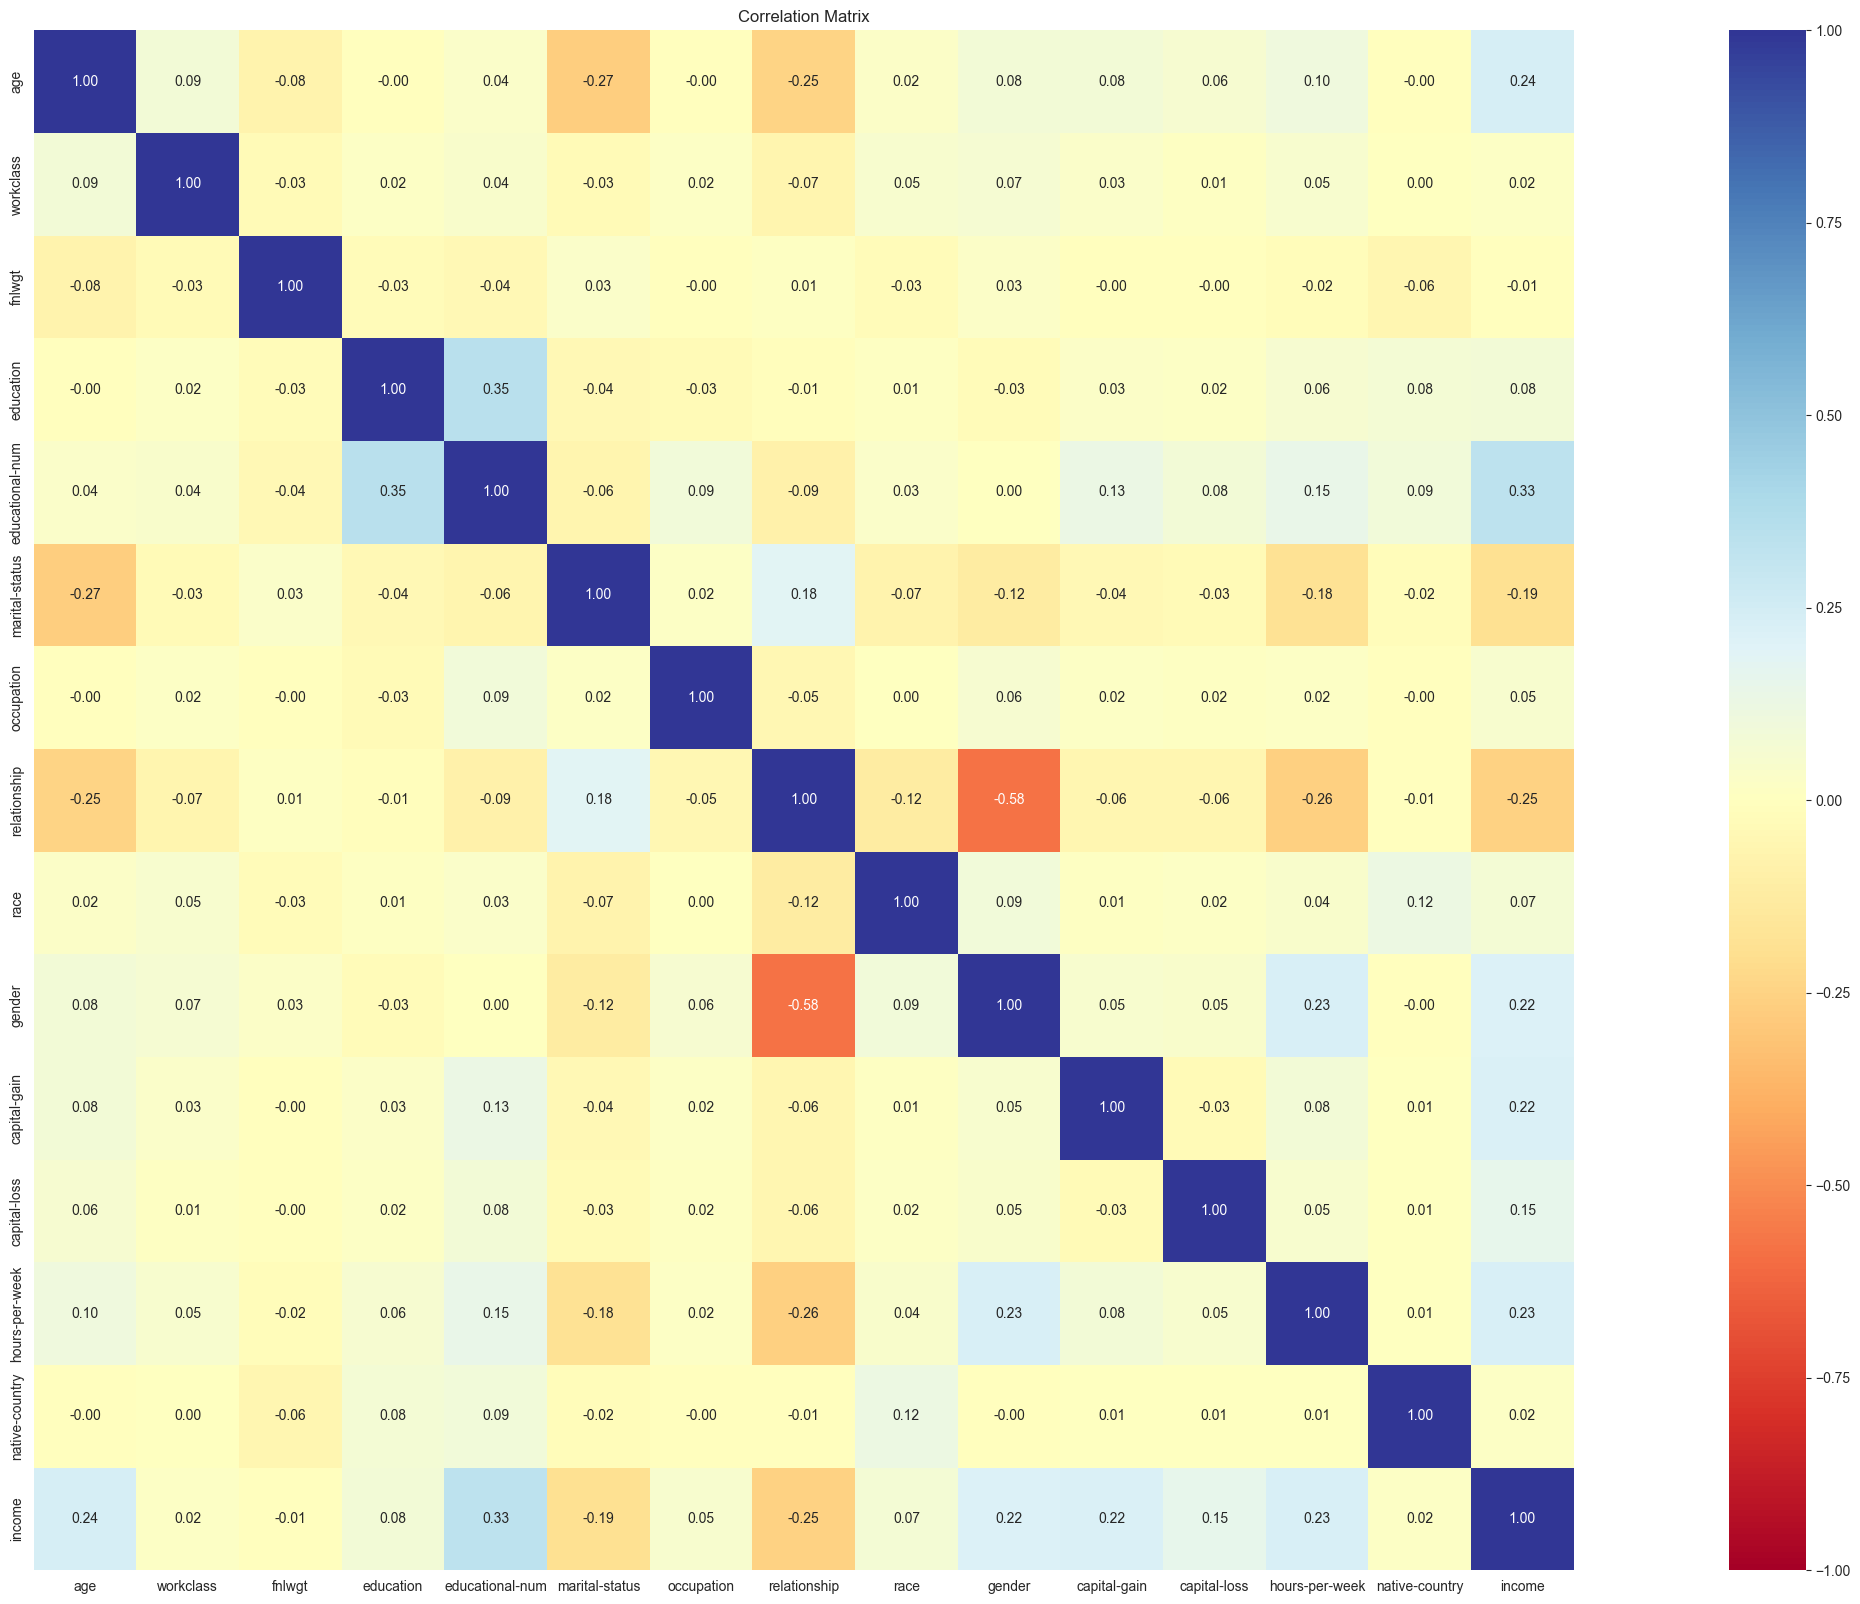

In [291]:
# Compute the correlation matrix
corr_mat = df.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(40, 20))

# Create the heatmap
sns.heatmap(corr_mat, cmap='RdYlBu', annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, ax=ax)

# Set the title
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

After analyzing the correlation matrix, we can drop the useless features.

In [292]:
df = df.drop(['workclass','occupation','native-country','race', 'fnlwgt'], axis=1)
print(df)

       age  education  educational-num  marital-status  relationship  gender  \
0       25          1                7               4             3       1   
1       38         11                9               2             0       1   
2       28          7               12               2             0       1   
3       44         15               10               2             0       1   
5       34          0                6               4             1       1   
...    ...        ...              ...             ...           ...     ...   
48837   27          7               12               2             5       0   
48838   40         11                9               2             0       1   
48839   58         11                9               6             4       0   
48840   22         11                9               4             3       1   
48841   52         11                9               2             5       0   

       capital-gain  capital-loss  hour

We can finally build the matrices X and y and the train / test sets

In [293]:
X = df.drop(['income'], axis=1)
y = df['income']

print(X)
print(y)

# Samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
print(X_train.shape)
print(X_test.shape)

       age  education  educational-num  marital-status  relationship  gender  \
0       25          1                7               4             3       1   
1       38         11                9               2             0       1   
2       28          7               12               2             0       1   
3       44         15               10               2             0       1   
5       34          0                6               4             1       1   
...    ...        ...              ...             ...           ...     ...   
48837   27          7               12               2             5       0   
48838   40         11                9               2             0       1   
48839   58         11                9               6             4       0   
48840   22         11                9               4             3       1   
48841   52         11                9               2             5       0   

       capital-gain  capital-loss  hour

## 3 - Ensemble learning methods

In [294]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Before starting to implement the ensemble methods and use libraries methods, we will tune the hyperparameters for the KNeighborsClassifier and the Logistic Regression.

In [295]:
# Hyperparameters tunning for KNEighborsClassifier
# Defining different values of n_neighbors to try
n_neighbors = [i for i in range(1, 27, 2)]

best_score = 0
best_k = 0
for k in n_neighbors:
    # For each value of n_neighbors, we execute a model prediction and look at its accuracy.
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model.predict(X_test)
    score = model.score(X_test, y_test)
    if score > best_score:  # The parameters with the best accuracy are stored into variables
        best_score = score
        best_k = k

###
# Hyperparameters tunning for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']
}
lr = GridSearchCV(LogisticRegression(), param_grid=param_grid)
lr.fit(X_train, y_train)
lr.predict(X_test)
accuracy = lr.score(X_test, y_test)

best_C = lr.best_params_['C']
best_solver = lr.best_params_['solver']

print('best parameter n_neighbors for KNC :', best_k)
print('best parameters for LR : C =', best_C, ', solver =', best_solver)

best parameter n_neighbors for KNC : 25
best parameters for LR : C = 100 , solver = liblinear


### A) Bagging

In [296]:
from collections import Counter
from sklearn.ensemble import BaggingClassifier

We can try several methods and compare their performances.


Bagging method from scratch.

In [297]:
def BaggingScratch(X_train, y_train, X_test, base_estimator, n_estimators=100):
    y_pred = np.zeros((X_test.shape[0],
                       n_estimators))  # Initialization of the array which will store all the predictions for n estimators

    for i in range(n_estimators):
        num = np.random.choice(X_train.index.values, size=X_train.shape[0], replace=True)  # Resample with replacement
        X_bstr = X_train.loc[num]  # Access to the row which has index num
        y_bstr = y_train.loc[num]  # Access to the column which has index num
        base_estimator.fit(X_bstr, y_bstr)  # Fitting with a base_estimator
        y_pred[:, i] = base_estimator.predict(X_test)  # Writing the predictions results in y_pred array

    # Aggregate the predictions using majority voting
    y_pred_majority = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        y_pred_i = y_pred[i, :]
        c = Counter(y_pred_i)  # Read all the values in y_pred_i
        y_pred_majority[i] = c.most_common(1)[0][
            0]  # Getting the most common element and its count (passing 1 as argument and [0][0] to get the most common element)

    return y_pred_majority


knc = KNeighborsClassifier(n_neighbors=best_k)
lr = LogisticRegression(C=best_C, solver=best_solver)
dtc = DecisionTreeClassifier()
y_pred_knc = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=knc)
y_pred_lr = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=lr)
y_pred_dtc = BaggingScratch(X_train=X_train, y_train=y_train, X_test=X_test, base_estimator=dtc)
# number of estimators is set to 100 by default

accuracyScratch_KNC = accuracy_score(y_test, y_pred_knc)
accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
accuracyScratch_DTC = accuracy_score(y_test, y_pred_dtc)
print('Accuracy for Bagging from Scratch with KNC :', accuracyScratch_KNC)
print('Accuracy for Bagging from Scratch with LR :', accuracyScratch_LR)
print('Accuracy for Bagging from Scratch with DTC :', accuracyScratch_DTC)

Accuracy for Bagging from Scratch with KNC : 0.8458643842691655
Accuracy for Bagging from Scratch with LR : 0.8161292702722645
Accuracy for Bagging from Scratch with DTC : 0.8339113111488231


Bagging method using scikit-learn.

- We, first, try the method with the KNC estimator, as it is a widely used supervised learning method.

In [298]:
# Bagging KNC
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [KNeighborsClassifier(n_neighbors=best_k)]}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model1_KNC_bag = GridSearchCV(BaggingClassifier(), param_grid=param_grid)
model1_KNC_bag.fit(X_train, y_train)
model1_KNC_bag.predict(X_test)
accuracy1 = model1_KNC_bag.score(X_test, y_test)

print("Bagging KNC")
print("Best value of n_estimators:", model1_KNC_bag.best_params_['n_estimators'])
print("Accuracy for bagging with KNC:", accuracy1)

Bagging KNC
Best value of n_estimators: 100
Accuracy for bagging with KNC: 0.8450527558474139


We can compare with the single method to see the results between the ensemble method and the single method used as estimator.

In [299]:
# Single KNC
model2_KNC = KNeighborsClassifier(n_neighbors=best_k)
model2_KNC.fit(X_train, y_train)
model2_KNC.predict(X_test)
accuracy2 = model2_KNC.score(X_test, y_test)

print("\nSingle KNC")
print("Accuracy with single KNC:", accuracy2)


Single KNC
Accuracy with single KNC: 0.8452003246513687


In [300]:
if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method have same accuracies.')
print('The difference in accuracy between the single method and the bagging is :', abs(accuracy2 - accuracy1))


The single method has a better accuracy than the bagging method.
The difference in accuracy between the single method and the bagging is : 0.00014756880395483396


- We try the bagging method with another estimator : Logistic Regression

In [301]:
# Bagging Logistic Regression
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression(C=best_C, solver=best_solver)]}

model1_LR_bag = GridSearchCV(BaggingClassifier(), param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_LR_bag.fit(X_train, y_train)
model1_LR_bag.predict(X_test)
accuracy1 = model1_LR_bag.score(X_test, y_test)

print("Bagging LR")
print("Best value of n_estimators for Logistic Regression:", model1_LR_bag.best_params_['n_estimators'])
print("Accuracy for bagging with Logistic Regression:", accuracy1)

Bagging LR
Best value of n_estimators for Logistic Regression: 100
Accuracy for bagging with Logistic Regression: 0.8148749354386483


We compare the bagging method with LR estimator with the single LR method

In [302]:
# Single Logistic Regression
model2_LR = LogisticRegression(C=best_C, solver=best_solver)
model2_LR.fit(X_train, y_train)
model2_LR.predict(X_test)
accuracy2 = model2_LR.score(X_test, y_test)

print("\nSingle LR")
print("Accuracy for Logistic Regression:", accuracy2)


Single LR
Accuracy for Logistic Regression: 0.8159817014683096


In [303]:
if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method have same accuracies.')
print('The difference accuracy between the single method and the bagging is :', abs(accuracy2 - accuracy1))


The single method has a better accuracy than the bagging method.
The difference accuracy between the single method and the bagging is : 0.0011067660296613102


- We can test the ensemble method on a last estimator which is the Decision Tree Classifier (DTC) which is the method used by default on most of ensemble learning methods.

In [304]:
# Bagging Decision Tree Classifier (default method on Scikit-Learn)
# Defining different values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [DecisionTreeClassifier()]}

model1_DTC_bag = GridSearchCV(BaggingClassifier(),
                          param_grid=param_grid)  # Performing Grid Search to find the best parameters for the Bagging Classifier
model1_DTC_bag.fit(X_train, y_train)
model1_DTC_bag.predict(X_test)
accuracy1 = model1_DTC_bag.score(X_test, y_test)

print("Bagging DTC")
print("Best value of n_estimators for Decision Tree Classifier:", model1_DTC_bag.best_params_['n_estimators'])
print("Accuracy for bagging with Decision Tree Classifier:", accuracy1)

Bagging DTC
Best value of n_estimators for Decision Tree Classifier: 200
Accuracy for bagging with Decision Tree Classifier: 0.8357559211982587


Let's compare the result of the bagging with DTC method and the single DTC method:

In [305]:
# Single Decision Tree classifier
model2_DTC = DecisionTreeClassifier()
model2_DTC.fit(X_train, y_train)
model2_DTC.predict(X_test)
accuracy2 = model2_DTC.score(X_test, y_test)

print("\nSingle DTC")
print("Accuracy for Decision Tree Classifier:", accuracy2)


Single DTC
Accuracy for Decision Tree Classifier: 0.8213679628126614


In [306]:
if (accuracy1 > accuracy2):
    print('\nThe bagging method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the bagging method.')
elif (accuracy1 == accuracy2):
    print('The single method and the bagging method have same accuracies.')
print('The difference accuracy between the single method and the bagging is :', abs(accuracy2 - accuracy1))


The bagging method has a better accuracy than the single method.
The difference accuracy between the single method and the bagging is : 0.014387958385597255


Making predictions on a new observation ...

In [324]:
features_name = ['age', 'education', 'educational-num', 'marital-status', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']
#newPerson_df = pd.DataFrame(data=[[25, 'Bachelors', 13, 'Married-civ-spouse', 'Husband', 'Male', 0, 0, 40]], columns=features_name)  # Observation row 25 ; verification
#newPerson_df = pd.DataFrame(data=[[45, 'Masters', 14, 'Married-civ-spouse', 'Husband', 'Male', 0, 0, 50]], columns=features_name)
newPerson_df = pd.DataFrame(data=[[35, 'Masters', 14, 'Separated', 'Not-in-family', 'Male', 0, 0, 50]], columns=features_name)

# Encoding the new data
for key1 in dicoEncoding.keys():
    if key1 in newPerson_df.columns:
        for key2 in dicoEncoding[key1].keys():
            if str(newPerson_df.iloc[0][key1]) == key2:
                newPerson_df.loc[0, key1] = dicoEncoding[key1][key2]   # Replace the raw data by the encoded data

# Making the prediction
pred_BaggingKNC = model1_KNC_bag.predict(newPerson_df)
if pred_BaggingKNC == 0:
    pred_BaggingKNC = 'Earns $50K or less'
elif pred_BaggingKNC == 1:
    pred_BaggingKNC = 'Earns more than $50K'
print("Prediction Bagging KNC:", pred_BaggingKNC)

pred_BaggingLR = model1_LR_bag.predict(newPerson_df)
if pred_BaggingLR == 0:
    pred_BaggingLR = 'Earns $50K or less'
elif pred_BaggingLR == 1:
    pred_BaggingLR = 'Earns more than $50K'
print("Prediction Bagging LR:", pred_BaggingLR)

pred_BaggingDTC = model1_DTC_bag.predict(newPerson_df)
if pred_BaggingDTC == 0:
    pred_BaggingDTC = 'Earns $50K or less'
elif pred_BaggingDTC == 1:
    pred_BaggingDTC = 'Earns more than $50K'
print("Prediction Bagging DTC:", pred_BaggingDTC)

Prediction Bagging KNC: Earns $50K or less
Prediction Bagging LR: Earns $50K or less
Prediction Bagging DTC: Earns more than $50K


### B) Boosting

Boosting method from scratch

In [308]:
# Importation of libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [309]:
def BoostingScratch(X_train, y_train, X_test, y_test, base_estimator, n_estimators=100):
    Evaluation = pd.DataFrame(y_train.copy())
    Evaluation['weights'] = 1 / X_test.shape[0]  # Set the initial weights w = 1/N
    # Run the boosting algorithm by creating T "weighted models"

    alphas = []
    models = []

    for t in range(n_estimators):
        # Train the Decision Stump(s)
        model = base_estimator.fit(X_train, y_train, sample_weight=np.array(Evaluation['weights']))

        # Append the single weak classifiers to a list which is later on used to make the weighted decision
        models.append(model)
        predictions = model.predict(X_train)
        score = model.score(X_train, y_train)

        # Add values to the Evaluation DataFrame
        Evaluation['predictions'] = predictions
        Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['income'], 1, 0)
        Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['income'], 1, 0)

        # Calculate the misclassification rate and accuracy
        accuracy = sum(Evaluation['evaluation']) / len(Evaluation['evaluation'])
        misclassification = sum(Evaluation['misclassified']) / len(Evaluation['misclassified'])

        # Caclulate the error
        err = np.sum(Evaluation['weights'] * Evaluation['misclassified']) / np.sum(Evaluation['weights'])

        # Calculate the alpha values
        alpha = np.log((1 - err) / err)
        alphas.append(alpha)

        # Update the weights wi --> These updated weights are used in the sample_weight parameter for the training of the next decision stump.
        Evaluation['weights'] *= np.exp(alpha * Evaluation['misclassified'])

        # With each model in the self.model list, make a prediction
        accuracy = []
        predictions = []

        for alpha, model in zip(alphas, models):
            prediction = alpha * model.predict(X_test)
            predictions.append(prediction)
            accuracy.append(
                np.sum(np.sign(np.sum(np.array(predictions), axis=0)) == y_test.values) / len(predictions[0]))

        predictions = np.sign(np.sum(np.array(predictions), axis=0))

        return predictions


lr = LogisticRegression(C=best_C, solver=best_solver)
dtc = DecisionTreeClassifier()
y_pred_lr = BoostingScratch(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, base_estimator=lr)
y_pred_dtc = BoostingScratch(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, base_estimator=dtc)
# number of estimators is set to 100 by default

accuracyScratch_LR = accuracy_score(y_test, y_pred_lr)
accuracyScratch_DTC = accuracy_score(y_test, y_pred_dtc)
print('Accuracy for Boosting from Scratch with LR :', accuracyScratch_LR)
print('Accuracy for Boosting from Scratch with DTC :', accuracyScratch_DTC)

Accuracy for Boosting from Scratch with LR : 0.7926658304434443
Accuracy for Boosting from Scratch with DTC : 0.820777687596842


Boosting method using Scikit-Learn

- The first estimator we use is the Logistic Regression

In [310]:
# Boosting Logistic Regression
# define the range of values of n_estimators to try
n_estimators = [10, 50, 100, 200]

# define the parameter grid for the bagging classifier
param_grid = {'n_estimators': n_estimators, 'base_estimator': [LogisticRegression(C=best_C, solver=best_solver)]}

# perform grid search to find the best value of n_estimators for the bagging classifier
model1_LR_boost = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid)
model1_LR_boost.fit(X_train, y_train)
model1_LR_boost.predict(X_test)
accuracy1 = model1_LR_boost.score(X_test, y_test)

print("\nBoosting LR")
print("Best value of n_estimators for Logistic Regression:", model1_LR_boost.best_params_['n_estimators'])
print("Accuracy for boosting with Logistic Regression:", accuracy1)


Boosting LR
Best value of n_estimators for Logistic Regression: 50
Accuracy for boosting with Logistic Regression: 0.80852947686859


We can compare the boosting results with the single method results :

In [311]:
# Single Logistic Regression
# perform grid search to find the best parameters for logistic regression
model2_LR = LogisticRegression(C=best_C, solver=best_solver)
model2_LR.fit(X_train, y_train)
model2_LR.predict(X_test)
accuracy2 = model2_LR.score(X_test, y_test)

print("Single LR")
print("Accuracy for Logistic Regression:", accuracy2)

Single LR
Accuracy for Logistic Regression: 0.8159817014683096


In [312]:
if (accuracy1 > accuracy2):
    print('\nThe boosting method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the boosting method.')
elif (accuracy1 == accuracy2):
    print('The single method and the boosting method have same accuracies.')
print('The difference in accuracy between the single method and the boosting is :', abs(accuracy2 - accuracy1))


The single method has a better accuracy than the boosting method.
The difference in accuracy between the single method and the boosting is : 0.007452224599719615


- The second estimator used is the Decision Tree Classifier

In [313]:
# Boosting Decision tree classifier
# Defining different values of n_estimators to try
n_estimators = [10, 20, 50, 100, 200]
learning_rate = [0.01, 0.1, 1.0]

# Defining the parameter grid for the Bagging Classifier
param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

# Performing Grid Search to find the best value of n_estimators for the bagging classifier
model1_DTC_boost = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid)
model1_DTC_boost.fit(X_train, y_train)
model1_DTC_boost.predict(X_test)
accuracy1 = model1_DTC_boost.score(X_test, y_test)

print("\nBoosting DTC")
print("Best value of n_estimators:", model1_DTC_boost.best_params_['n_estimators'])
print("Best value of learning_rate:", model1_DTC_boost.best_params_['learning_rate'])
print("Accuracy for boosting with Decision tree classifier:", accuracy1)


Boosting DTC
Best value of n_estimators: 200
Best value of learning_rate: 1.0
Accuracy for boosting with Decision tree classifier: 0.8559728473400723


Comparison with the single DTC method

In [314]:
# Single Decision tree
model2_DTC = DecisionTreeClassifier()
model2_DTC.fit(X_train, y_train)
model2_DTC.predict(X_test)
accuracy2 = model2_DTC.score(X_test, y_test)

print("Single DTC")
print("Accuracy with single Decision tree classifier:", accuracy2)

Single DTC
Accuracy with single Decision tree classifier: 0.8208514719988195


In [315]:
if (accuracy1 > accuracy2):
    print('\nThe boosting method has a better accuracy than the single method.')
elif (accuracy1 < accuracy2):
    print('\nThe single method has a better accuracy than the boosting method.')
elif (accuracy1 == accuracy2):
    print('The single method and the boosting method as same accuracies.')
print('The difference in accuracy between the single method and the boosting is :', abs(accuracy2 - accuracy1))


The boosting method has a better accuracy than the single method.
The difference in accuracy between the single method and the boosting is : 0.035121375341252814


Making predictions on a new observation ...

In [325]:
features_name = ['age', 'education', 'educational-num', 'marital-status', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']
#newPerson_df = pd.DataFrame(data=[[25, 'Bachelors', 13, 'Married-civ-spouse', 'Husband', 'Male', 0, 0, 40]], columns=features_name)  # Observation row 25 ; verification
#newPerson_df = pd.DataFrame(data=[[45, 'Masters', 14, 'Married-civ-spouse', 'Husband', 'Male', 0, 0, 50]], columns=features_name)
newPerson_df = pd.DataFrame(data=[[35, 'Masters', 14, 'Separated', 'Not-in-family', 'Male', 0, 0, 50]], columns=features_name)

# Encoding the new data
for key1 in dicoEncoding.keys():
    if key1 in newPerson_df.columns:
        for key2 in dicoEncoding[key1].keys():
            if str(newPerson_df.iloc[0][key1]) == key2:
                newPerson_df.loc[0, key1] = dicoEncoding[key1][key2]   # Replace the raw data by the encoded data

# Making the prediction
pred_BoostingLR = model1_LR_boost.predict(newPerson_df)
if pred_BoostingLR == 0:
    pred_BoostingLR = 'Earns $50K or less'
elif pred_BoostingLR == 1:
    pred_BoostingLR = 'Earns more than $50K'
print("Prediction Boosting LR:", pred_BoostingLR)

pred_BoostingDTC = model1_DTC_boost.predict(newPerson_df)
if pred_BoostingDTC == 0:
    pred_BoostingDTC = 'Earns $50K or less'
elif pred_BoostingDTC == 1:
    pred_BoostingDTC = 'Earns more than $50K'
print("Prediction Boosting DTC:", pred_BoostingDTC)

Prediction Boosting LR: Earns $50K or less
Prediction Boosting DTC: Earns $50K or less


### C) Stacking

We import the needed libraries

In [317]:
import pandas as pd
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble as se

Firstly, we add some prediction functions

In [318]:
KNC = KNeighborsClassifier(n_neighbors=best_k)  # initialising KNeighbors Classifier
model_kNeighborsClassifier = KNC.fit(X_train, y_train)  # fitting Training Set
pred_knc_test = model_kNeighborsClassifier.predict(X_test)  # Predicting on test dataset
acc_knc = accuracy_score(y_test, pred_knc_test)  # evaluating accuracy score
print('Accuracy score of the KNeighbors Classifier is:', acc_knc)

###

NB = GaussianNB()  # initialising Naive Bayes
model_NaiveBayes = NB.fit(X_train, y_train)
pred_nb_test = model_NaiveBayes.predict(X_test)
acc_nb = accuracy_score(y_test, pred_nb_test)
print('Accuracy of the Naive Bayes Classifier:', acc_nb)

###

SGD = SGDClassifier(loss='log', random_state=0)
model_SGD_Classifier = SGD.fit(X_train, y_train)  # fitting Training Set
pred_sgd_test = model_SGD_Classifier.predict(X_test)  # Predicting on test dataset
acc_sgd = accuracy_score(y_test, pred_sgd_test)  # evaluating accuracy score
print('Accuracy score of the SGD Classifier is:', acc_sgd)

###

TREE = DecisionTreeClassifier(random_state=0)
model_Tree = TREE.fit(X_train, y_train)
pred_tree_test = model_Tree.predict(X_test)
acc_tree = accuracy_score(y_test, pred_tree_test)
print('Accuracy of the Decision Tree Classifier:', acc_tree)

Accuracy score of the KNeighbors Classifier is: 0.8452003246513687
Accuracy of the Naive Bayes Classifier: 0.7879436287168893
Accuracy score of the SGD Classifier is: 0.7802700509112374
Accuracy of the Decision Tree Classifier: 0.8218844536265033


Then, we put these functions into a classifier (here the Stacking classifier) and train it.

In [319]:
lr = LogisticRegression(C=best_C, solver=best_solver)  # defining meta-classifier
clf_stack = StackingClassifier(classifiers=[KNC, NB, SGD, TREE], meta_classifier=lr, use_probas=True,
                               use_features_in_secondary=True)  #Main StacklingClassifier from mlxtend library

model_stack = clf_stack.fit(X_train, y_train)  # training of stacked model
pred_stack = model_stack.predict(X_test)  # predictions on test data using stacked model

acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy
print('Accuracy score of the Stacking model:', acc_stack)

Accuracy score of the Stacking model: 0.8190068619493839


Stacking method using scikit-learn

In [320]:
model_stack_bis = se.StackingClassifier([('SGD', SGD),
                                         ('Tree', TREE),
                                         ('KNC', KNC)],
                                        final_estimator=KNeighborsClassifier(n_neighbors=best_k))

model_stack_bis.fit(X_train, y_train)
score_stack = model_stack_bis.score(X_test, y_test)

print("Accuracy of the Stacking model (using scikit-learn):", score_stack)

Accuracy of the Stacking model (using scikit-learn): 0.8370102560318748


We can compare results

In [321]:
print('Comparison between the single KNC and mlxtend stacking')
if (acc_knc > acc_stack):
    print('The single KNC model has a better accuracy than the stacking model from mlxtend.')
elif (acc_stack > acc_knc):
    print('The stacking model from mlxtend has a better accuracy than the stacking model from the single KNC.')
elif (acc_knc == acc_stack):
    print('The stacking model from mlxtend and the single KNC have same accuracies.')
print('The difference in accuracy between the single KNC and the mlxtend stacking is :', abs(acc_knc - acc_stack))

###

print('\nComparison between the single Naive Bayes and mlxtend stacking')
if (acc_nb > acc_stack):
    print('The single Naive Bayes model has a better accuracy than the stacking model from mlxtend.')
elif (acc_stack > acc_nb):
    print('The stacking model from mlxtend has a better accuracy than the stacking model from the single Naive Bayes.')
elif (acc_nb == acc_stack):
    print('The stacking model from mlxtend and the single Naive Bayes have same accuracies.')
print('The difference in accuracy between the single Naive Bayes and the mlxtend stacking is :', abs(acc_nb - acc_stack))

###

print('\nComparison between the single SGD and mlxtend stacking')
if (acc_sgd > acc_stack):
    print('The single SGD model has a better accuracy than the stacking model from mlxtend.')
elif (acc_stack > acc_sgd):
    print('The stacking model from mlxtend has a better accuracy than the stacking model from the single SGD.')
elif (acc_sgd == acc_stack):
    print('The stacking model from mlxtend and the single SGD have same accuracies.')
print('The difference in accuracy between the single SGD and the mlxtend stacking is :', abs(acc_sgd - acc_stack))

###

print('\nComparison between the single DTC and mlxtend stacking')
if (acc_tree > acc_stack):
    print('The single DTC model has a better accuracy than the stacking model from mlxtend.')
elif (acc_stack > acc_tree):
    print('The stacking model from mlxtend has a better accuracy than the stacking model from the single DTC.')
elif (acc_tree == acc_stack):
    print('The stacking model from mlxtend and the single DTC have same accuracies.')
print('The difference in accuracy between the single DTC and the mlxtend stacking is :', abs(acc_tree - acc_stack))

Comparison between the single KNC and mlxtend stacking
The single KNC model has a better accuracy than the stacking model from mlxtend.
The difference in accuracy between the single KNC and the mlxtend stacking is : 0.02619346270198486

Comparison between the single Naive Bayes and mlxtend stacking
The stacking model from mlxtend has a better accuracy than the stacking model from the single Naive Bayes.
The difference in accuracy between the single Naive Bayes and the mlxtend stacking is : 0.031063233232494603

Comparison between the single SGD and mlxtend stacking
The stacking model from mlxtend has a better accuracy than the stacking model from the single SGD.
The difference in accuracy between the single SGD and the mlxtend stacking is : 0.038736811038146524

Comparison between the single DTC and mlxtend stacking
The single DTC model has a better accuracy than the stacking model from mlxtend.
The difference in accuracy between the single DTC and the mlxtend stacking is : 0.002877591

In [322]:
print('Comparison between the single KNC and scikit-learn stacking')
if (acc_knc > score_stack):
    print('The single KNC model has a better accuracy than the stacking model from scikit-learn.')
elif (score_stack > acc_knc):
    print('The stacking model from scikit-learn has a better accuracy than the stacking model from the single KNC.')
elif (acc_knc == score_stack):
    print('The stacking model from scikit-learn and the single KNC have same accuracies.')
print('The difference in accuracy between the single KNC and the scikit-learn stacking is :', abs(acc_knc - score_stack))

###

print('\nComparison between the single Naive Bayes and scikit-learn stacking')
if (acc_nb > score_stack):
    print('The single Naive Bayes model has a better accuracy than the stacking model from scikit-learn.')
elif (score_stack > acc_nb):
    print('The stacking model from scikit-learn has a better accuracy than the stacking model from the single Naive Bayes.')
elif (acc_nb == score_stack):
    print('The stacking model from scikit-learn and the single Naive Bayes have same accuracies.')
print('The difference in accuracy between the single Naive Bayes and the scikit-learn stacking is :', abs(acc_nb - score_stack))

###

print('\nComparison between the single SGD and scikit-learn stacking')
if (acc_sgd > score_stack):
    print('The single SGD model has a better accuracy than the stacking model from scikit-learn.')
elif (score_stack > acc_sgd):
    print('The stacking model from scikit-learn has a better accuracy than the stacking model from the single SGD.')
elif (acc_sgd == score_stack):
    print('The stacking model from scikit-learn and the single SGD have same accuracies.')
print('The difference in accuracy between the single SGD and the scikit-learn stacking is :', abs(acc_sgd - score_stack))

###

print('\nComparison between the single DTC and scikit-learn stacking')
if (acc_tree > score_stack):
    print('The single DTC model has a better accuracy than the stacking model from scikit-learn.')
elif (score_stack > acc_tree):
    print('The stacking model from scikit-learn has a better accuracy than the stacking model from the single DTC.')
elif (acc_tree == score_stack):
    print('The stacking model from scikit-learn and the single DTC have same accuracies.')
print('The difference in accuracy between the single DTC and the scikit-learn stacking is :', abs(acc_tree - score_stack))

Comparison between the single KNC and scikit-learn stacking
The single KNC model has a better accuracy than the stacking model from scikit-learn.
The difference in accuracy between the single KNC and the scikit-learn stacking is : 0.008190068619493895

Comparison between the single Naive Bayes and scikit-learn stacking
The stacking model from scikit-learn has a better accuracy than the stacking model from the single Naive Bayes.
The difference in accuracy between the single Naive Bayes and the scikit-learn stacking is : 0.04906662731498557

Comparison between the single SGD and scikit-learn stacking
The stacking model from scikit-learn has a better accuracy than the stacking model from the single SGD.
The difference in accuracy between the single SGD and the scikit-learn stacking is : 0.05674020512063749

Comparison between the single DTC and scikit-learn stacking
The stacking model from scikit-learn has a better accuracy than the stacking model from the single DTC.
The difference in a

Making predictions on a new observation ...

In [326]:
features_name = ['age', 'education', 'educational-num', 'marital-status', 'relationship', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']
#newPerson_df = pd.DataFrame(data=[[25, 'Bachelors', 13, 'Married-civ-spouse', 'Husband', 'Male', 0, 0, 40]], columns=features_name)  # Observation row 25 ; verification
#newPerson_df = pd.DataFrame(data=[[45, 'Masters', 14, 'Married-civ-spouse', 'Husband', 'Male', 0, 0, 50]], columns=features_name)
newPerson_df = pd.DataFrame(data=[[35, 'Masters', 14, 'Separated', 'Not-in-family', 'Male', 0, 0, 50]], columns=features_name)

# Encoding the new data
for key1 in dicoEncoding.keys():
    if key1 in newPerson_df.columns:
        for key2 in dicoEncoding[key1].keys():
            if str(newPerson_df.iloc[0][key1]) == key2:
                newPerson_df.loc[0, key1] = dicoEncoding[key1][key2]  # Replace the raw data by the encoded data

# Making the prediction
pred_Stack = model_stack_bis.predict(newPerson_df)
if pred_Stack == 0:
 pred_Stack = 'Earns $50K or less'
elif pred_Stack == 1:
 pred_Stack = 'Earns more than $50K'
print("Prediction Stacking:", pred_Stack)

Prediction Stacking: Earns more than $50K
